In [16]:
from __future__ import division, print_function
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

In [27]:
df_weatherAUS = pd.read_csv('data set/weatherAUS.csv')
df_weatherAUS.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [28]:
df_weatherAUS  = df_weatherAUS.drop(['Date','Location','Evaporation','Sunshine', 'Cloud9am','Cloud3pm',
                           'WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am',
                           'WindSpeed3pm'], axis=1)

In [29]:
y =  df_weatherAUS.RainTomorrow
data = df_weatherAUS.drop(['RainTomorrow'], axis=1)

Not Rain :  31877
Rain:  110316


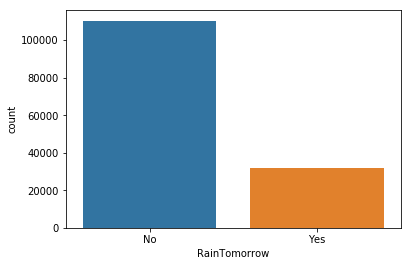

In [30]:
plot_sb = sb.countplot(y, label='Total')
Rain, NotRain = y.value_counts()
print('Not Rain : ',NotRain)
print('Rain: ',Rain)

In [31]:
data = data.replace({'No':0, 'Yes':1})
data = data.fillna(0)
y = y.replace({'No':0, 'Yes':1})
y = y.fillna(0)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=1)

In [39]:
abl = AdaBoostClassifier()
abl.fit(X=X_train, y=y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [40]:
gbm = XGBClassifier()
gbm.fit(X=X_train, y=y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [41]:
lgbc =  LGBMClassifier()
lgbc.fit(X=X_train, y=y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [42]:
cbc = CatBoostClassifier()
cbc.fit(X=X_train, y=y_train)

Learning rate set to 0.063968
0:	learn: 0.4376441	total: 83.3ms	remaining: 1m 23s
1:	learn: 0.2793693	total: 149ms	remaining: 1m 14s
2:	learn: 0.1781117	total: 210ms	remaining: 1m 9s
3:	learn: 0.1120772	total: 262ms	remaining: 1m 5s
4:	learn: 0.0739105	total: 313ms	remaining: 1m 2s
5:	learn: 0.0465966	total: 364ms	remaining: 1m
6:	learn: 0.0307830	total: 423ms	remaining: 60s
7:	learn: 0.0208394	total: 476ms	remaining: 59s
8:	learn: 0.0136175	total: 520ms	remaining: 57.3s
9:	learn: 0.0098871	total: 588ms	remaining: 58.2s
10:	learn: 0.0073499	total: 667ms	remaining: 1m
11:	learn: 0.0053576	total: 728ms	remaining: 59.9s
12:	learn: 0.0039439	total: 779ms	remaining: 59.1s
13:	learn: 0.0029639	total: 828ms	remaining: 58.3s
14:	learn: 0.0022432	total: 882ms	remaining: 57.9s
15:	learn: 0.0017280	total: 940ms	remaining: 57.8s
16:	learn: 0.0013562	total: 1s	remaining: 57.9s
17:	learn: 0.0010835	total: 1.05s	remaining: 57.4s
18:	learn: 0.0008803	total: 1.11s	remaining: 57.4s
19:	learn: 0.0007270	

In [43]:
print ('AdaBoostClassifier = ', accuracy_score(y_test, abl.predict(X_test)))
print ('XGBClassifier = ', accuracy_score(y_test, gbm.predict(X_test)))
print ('LGBMClassifier = ', accuracy_score(y_test, lgbc.predict(X_test)))
print ('CatBoostClassifier = ', accuracy_score(y_test, cbc.predict(X_test)))

AdaBoostClassifier =  1.0
XGBClassifier =  1.0
LGBMClassifier =  1.0
CatBoostClassifier =  1.0


In [44]:
mean_prophecy = (abl.predict(X_test) + gbm.predict(X_test) + lgbc.predict(X_test) + cbc.predict(X_test)) / 4
accuracy_score(y_test, mean_prophecy)

1.0

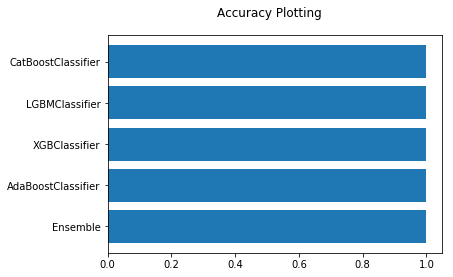

In [45]:
values = [accuracy_score(y_test, mean_prophecy), accuracy_score(y_test, abl.predict(X_test)), accuracy_score(y_test, gbm.predict(X_test)),
          accuracy_score(y_test, lgbc.predict(X_test)), accuracy_score(y_test, cbc.predict(X_test))]

plt.barh(['Ensemble', 'AdaBoostClassifier', 'XGBClassifier', 'LGBMClassifier', 'CatBoostClassifier'], values, )
plt.suptitle('Accuracy Plotting')
plt.show()